In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [12]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

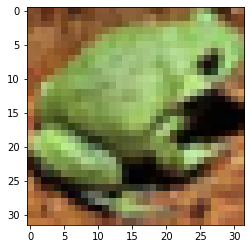

'frog'

In [6]:
# Displaying image
img = 2100
plt.imshow(x_train[img])
plt.show()
classes[y_train[img][0]]

Dataset pre-processing

In [7]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [21]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [22]:
x_train2.shape,x_test2.shape

((50000, 3072), (10000, 3072))

Building an RFClassifier model

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model=RandomForestClassifier()

In [19]:
model.fit(x_train2,y_train)
#training time:4 minutes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

RFClassifier model evaluation

In [23]:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
accuracy_score(y_pred,y_test)

0.4686

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1049
           1       0.56      0.52      0.54      1076
           2       0.32      0.37      0.34       867
           3       0.26      0.34      0.30       774
           4       0.41      0.40      0.40      1016
           5       0.40      0.42      0.41       946
           6       0.57      0.48      0.52      1202
           7       0.45      0.52      0.48       872
           8       0.60      0.58      0.59      1047
           9       0.55      0.48      0.51      1151

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [28]:
confusion_matrix(y_pred,y_test)

array([[560,  36, 100,  54,  59,  34,   9,  53,  93,  51],
       [ 33, 563,  38,  47,  24,  30,  33,  44,  95, 169],
       [ 57,  14, 321,  86, 138, 101,  78,  42,  14,  16],
       [ 26,  39,  78, 262,  46, 139,  72,  54,  30,  28],
       [ 32,  19, 156,  82, 408,  77, 101, 105,  17,  19],
       [ 17,  29,  59, 186,  53, 401,  62,  86,  32,  21],
       [ 27,  36, 122, 142, 139,  77, 571,  48,  15,  25],
       [ 24,  36,  68,  53,  82,  83,  22, 450,  17,  37],
       [169,  54,  28,  23,  26,  28,   5,  24, 603,  87],
       [ 55, 174,  30,  65,  25,  30,  47,  94,  84, 547]])

Building a KNN model

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier(n_neighbors=7)

In [64]:
knn.fit(x_train2,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

KNN model evaluation

In [65]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [66]:
accuracy_score(y_pred_knn,y_test)

0.3358

In [67]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [68]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]])

Building a Decision Tree model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtc=DecisionTreeClassifier()

In [57]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

DecisionTreeClassifier model evaluation

In [58]:
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 1, 1, ..., 2, 3, 4], dtype=uint8)

In [59]:
accuracy_score(y_pred_dtc,y_test)

0.2695

In [60]:
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34      1050
           1       0.28      0.29      0.29       954
           2       0.22      0.20      0.21      1080
           3       0.18      0.19      0.19       994
           4       0.22      0.21      0.22      1044
           5       0.21      0.22      0.22       934
           6       0.28      0.29      0.28       989
           7       0.26      0.28      0.27       954
           8       0.40      0.38      0.39      1045
           9       0.28      0.30      0.29       956

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [61]:
confusion_matrix(y_pred_dtc,y_test)

array([[350,  78,  95,  63,  58,  59,  48,  74, 140,  85],
       [ 80, 279,  43,  55,  49,  58,  43,  76,  97, 174],
       [ 81,  63, 217, 120, 157, 101, 129,  94,  60,  58],
       [ 53,  82, 100, 185,  92, 155, 118,  89,  51,  69],
       [ 72,  64, 148, 113, 223,  86, 146, 103,  43,  46],
       [ 49,  46, 106, 126, 108, 209,  95, 102,  41,  52],
       [ 37,  49, 108, 135, 126, 113, 283,  66,  26,  46],
       [ 48,  65,  91,  82, 105,  98,  64, 264,  43,  94],
       [154, 118,  39,  55,  34,  68,  22,  62, 401,  92],
       [ 76, 156,  53,  66,  48,  53,  52,  70,  98, 284]])

Building a Naive Bayes(NB) model

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb=GaussianNB()

In [71]:
nb.fit(x_train2,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

NB model evaluation

In [72]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [73]:
accuracy_score(y_pred_nb,y_test)

0.2976

In [74]:
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



In [75]:
confusion_matrix(y_pred_nb,y_test)

array([[494, 141, 225, 163,  86, 156, 106, 134, 168, 144],
       [ 20, 166,  24,  36,   8,  17,   2,  24,  41,  67],
       [ 39,  24,  83,  54,  57,  55,  60,  36,  18,  17],
       [ 10,  31,  15,  76,  26,  51,  18,  41,  17,  20],
       [ 84,  66, 292, 151, 417, 167, 228, 228,  56,  48],
       [ 34,  72,  48, 129,  38, 264,  46,  94,  83,  32],
       [ 50, 192, 209, 262, 265, 159, 467, 102,  39, 101],
       [  9,  19,  21,  26,  22,  36,  15, 131,   8,  23],
       [200, 121,  54,  34,  50,  57,  19,  72, 471, 141],
       [ 60, 168,  29,  69,  31,  38,  39, 138,  99, 407]])

Testing for custom input

image-bird-
https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200

In [85]:
import cv2

In [87]:
img_path='/content/bird.jfif'

img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(32,32))



In [88]:
#so,eventually,model.predict() should also be a 2d input

nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [89]:
ans=model.predict(img_arr2)
print(classes[ans[0]])
#RandomForestClassifier

bird


In [90]:
ans=knn.predict(img_arr2)
print(classes[ans[0]])
#KNN

airplane


In [91]:
ans=dtc.predict(img_arr2)
print(classes[ans[0]])
#Decision Tree Classifier

horse


In [92]:
ans=nb.predict(img_arr2)
print(classes[ans[0]])
#Naive Bayes Classifer

automobile
